# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [35]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/dasha/Downloads/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [36]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


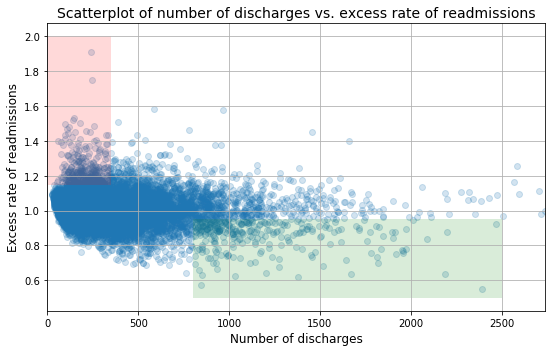

In [37]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [38]:
# # Your turn
# # I do not agree with the above analysis. The analysis assumes correlation in-between the two variables without 
# # statistically questioning it. Moreover, just looking at the graph it seems that the Excess Readmission Ratios seem
# to cluster along a horizontal line, meaning there is probably little to non-correlation there. It seems that 
# the dilution of decreasing amount of readmissions comes from lower amount of samples size for the hospitals 
# with discharge ratios above 1000. 

The slope of regression line is:  -2.8565052943822905e-05
The intercept of regression line is:  1.0179475579544215


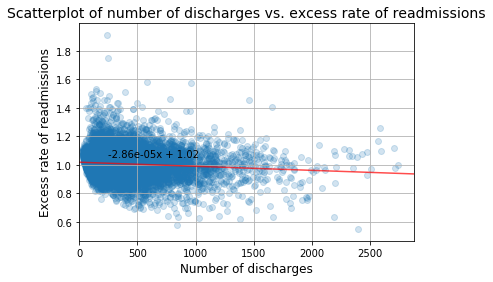

In [39]:
# First take a look at the diagram ourselves and find the best-fit line to see if there is correlation between x and y 

x=clean_hospital_read_df['Number of Discharges'][81:-3]
y=clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

plt.scatter(x,y,alpha=.2)
plt.xlim(0)
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.grid(True)

slope,intercept = np.polyfit(x,y,1)
xp=np.array([0,3000])
yp=slope*xp+intercept 
plt.plot(xp,yp,color='red',alpha=.7)
plt.text(250,1.05,'-2.86e-05x + 1.02')

print('The slope of regression line is: ',slope)
print('The intercept of regression line is: ',intercept)

The confidence interval for the slope of regression between two variables is:  [-3.55104345e-05 -2.17517657e-05]


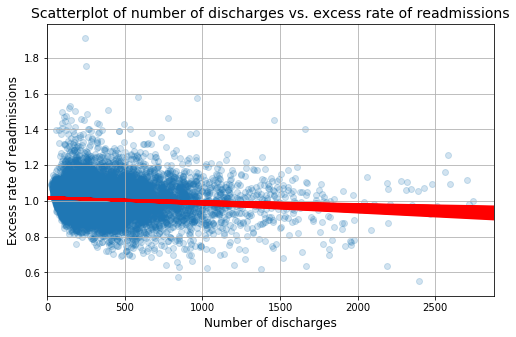

In [40]:
# From looking at the slope of the regression line in-between the two variables, it seems that correlation 
# between the two variable is very weak or close to unexistant
# What is the confidence interval of the slope in this relationship? 
 
plt.scatter(x,y,alpha=.2)
plt.xlim(0)
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.grid(True)

def pair_boot(data_1,data_2):
    ind=np.arange(len(data_1))
    intercept_bs=np.empty(10000)
    slope_bs=np.empty(10000)
    for i in range(10000):
        ind_rep=np.random.choice(ind,len(ind))
        bs_x,bs_y= data_1[ind_rep],data_2[ind_rep]
        slope_bs[i],intercept_bs[i]=np.polyfit(bs_x,bs_y,1)
    return slope_bs,intercept_bs
sp,intr = pair_boot(np.array(x),np.array(y))
for i in range(10000): 
    yp_bs=sp[i]*xp+intr[i]
    plt.plot(xp,yp_bs,color='red')
    
conf_int_slope=np.percentile(sp,[2.5,97.5])
print('The confidence interval for the slope of regression between two variables is: ',conf_int_slope)

-0.09309554287590442
The p-value for the test statistic is:  0.0


Text(0,0.5,'Count')

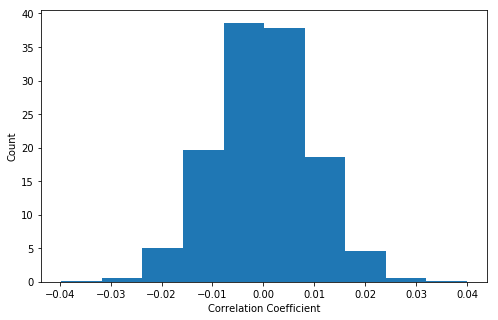

In [41]:
# The confidence interval also points to the fact that the correlation is low or non-existant
# Hypothesis: 
# Ho: Number of Discharges has no correlation with Excess Rate of Re-Admissions
# Ha: Number of Discharges has an effect on Excess Rate of Re-Admissions 
# Hypothesis testing... 

def pearson_r(data1,data2):
    corr=np.corrcoef(data1,data2)
    return corr[0,1]

def perm_numdis(data1,data2): 
    bs_rep=np.empty(100000)
    for i in range(100000): 
        data1_p=np.random.permutation(data1)
        bs_rep[i]=pearson_r(data1_p,data2)
    return bs_rep

bs_replicates = perm_numdis(np.array(x),np.array(y))
obs_corr = pearson_r(np.array(x),np.array(y))
print(obs_corr)
plt.hist(bs_replicates, density=True)
p_value=np.sum(bs_replicates<=obs_corr)/len(bs_replicates)
print('The p-value for the test statistic is: ',p_value)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Count')

In [42]:
# Sample sizes 
size_hig_discharge=len(x[x>1000])
size_low_discharge=len(x[x<100])
print('Sample size for Discharge Count less than 100: ',size_low_discharge)
print('Sample size for Discharge Count more than 1000: ',size_hig_discharge)
len(x)

Sample size for Discharge Count less than 100:  1188
Sample size for Discharge Count more than 1000:  460


11494

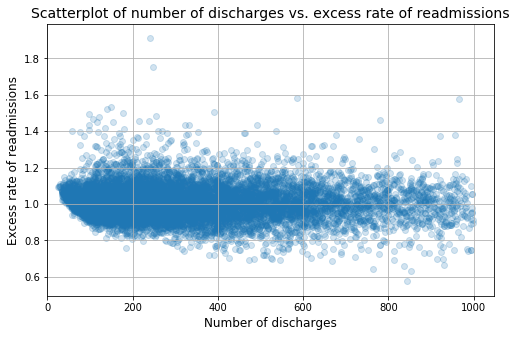

In [43]:
clean_hospital_read_df=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<1000]
xn=clean_hospital_read_df['Number of Discharges']
yn=clean_hospital_read_df['Excess Readmission Ratio']
plt.scatter(xn,yn,alpha=.2)
plt.xlim(0)
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.grid(True)

In [44]:
# The p-value in this test statistic is very close to zero and is significant at the the alph .01. In other words the
# correlation between the 'Number of Discharges' and 'Excess Ratio of Readmissions' is statistically significant. 
# However, is it practically significant??? The answer is no. Looking at the confidence level for the boostrapped 
# slope above, the interpretation of the result is that rate of decrease in readmission to discharge lays somewhere 
# between -3.57e-05  to -2.17e-05, meaning the decrease in the amount of readmissions is extremely low. 
# With that in mind, practically one will most likely conclude that there is essentially no corrleation between 
# the discharge number and readmission rate, meaning the relationship between the two variables cannot be 
# conclusively drawn. 
# Therefore, the conclusions drawn previously very vague do not work well as predictors. The decrease in the rate 
# of readmission is mostly likely random. 
# As for the mean comparison between hospitals with <100 discharges and hospitals with > 1000 discharges, the disparity
# mostlikely occurs due to lack of comparable sample sizes. As one can see above, removal of the scarce population of 
# hospitals with discharge number > 1000, can even further illustrate the lack of correlation between the two variables
# questioned.
# Plotting of the scatterplot from the first analysis was misleading and had to be well analyzed before jumping 
# to conclusions. 